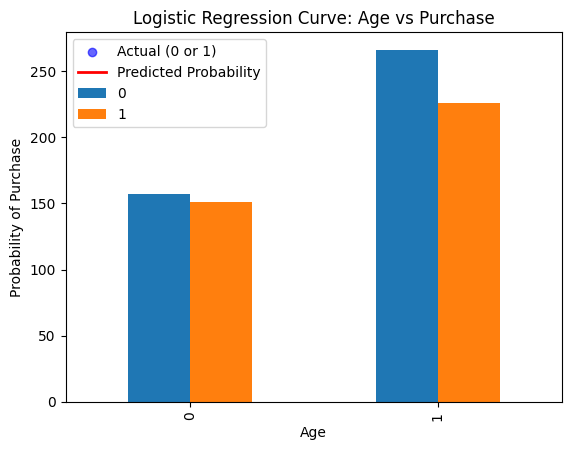

In [2]:
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_excel("logistic_dataset.xlsx","Sheet1")
df.head()

df.groupby('Purchased').mean(numeric_only = True)

correlation = df.corr(numeric_only=True)
correlation['Purchased'].sort_values()

X = df.drop(['Purchased'], axis = 'columns')
y = df['Purchased']

pd.crosstab(df.Purchased,df.Gender).plot(kind = 'bar')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

model.score(X_test, y_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


y_pred

model.score(X_test, y_test)

import numpy as np
import matplotlib.pyplot as plt

# Choose the feature to visualize (e.g., 'Age')
X_feature = 'Age'

# Sort dataset by that feature for smooth plotting
sorted_indices = df[X_feature].sort_values().index
X_sorted = df.loc[sorted_indices, X_feature]
y_sorted = df.loc[sorted_indices, 'Purchased']

# ✅ Use X directly, not df[X]
y_prob = model.predict_proba(X)[:, 1]  # probability of class 1 (Purchased)
y_prob_sorted = y_prob[sorted_indices]

# Plot actual purchase points (blue dots)
plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label='Actual (0 or 1)')

# Plot logistic regression probability curve (red line)
plt.plot(X_sorted, y_prob_sorted, color='red', linewidth=2, label='Predicted Probability')

plt.xlabel(X_feature)
plt.ylabel('Probability of Purchase')
plt.title(f'Logistic Regression Curve: {X_feature} vs Purchase')
plt.legend()
plt.show()




In [3]:
import joblib

In [4]:
joblib.dump(model,'Probabilitiy_of_purchase_joblib')

['Probabilitiy_of_purchase_joblib']